In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import seaborn as sns

In [8]:
DATA_PATH = "../data/"

In [9]:
results = pd.read_excel(DATA_PATH + "data.xlsx")

In [10]:
results.rename({'MC':'MS'}, axis=1, inplace=True)

In [11]:
lr = LinearRegression(normalize=True)

In [12]:
X = results[['SFC','SC','BC','SLOC','NT','NB']]
y = results['MS']

In [13]:
rfe = RFE(estimator=lr, n_features_to_select=1, step=1)

In [14]:
rfe.fit(X,y)

RFE(estimator=LinearRegression(normalize=True), n_features_to_select=1)

In [15]:
rfe.ranking_

array([1, 3, 2, 6, 5, 4])

In [16]:
lr.fit(X,y)

LinearRegression(normalize=True)

In [17]:
lr.score(X,y)

0.6078348195113716

In [18]:
lr.coef_

array([ 1.00363954e+00, -6.10730110e-02, -3.04683396e-01,  4.40765051e-05,
        1.36224262e-03, -1.72804246e-03])

In [29]:
lr.fit(X[['BC']],y)

LinearRegression(normalize=True)

In [30]:
lr.score(X[['BC']],y)

0.26851469961580965

In [21]:
lr.coef_

array([0.67892])

In [22]:
lr.intercept_

17.931343539320295

In [24]:
slope, intercept, r_value, pv, se = stats.linregress(results['SFC'],results['MS'])
slope, intercept, r_value, pv, se

(0.6789200018452494,
 17.931343539320288,
 0.7312729082149866,
 0.00011036677838807743,
 0.14159979162588604)

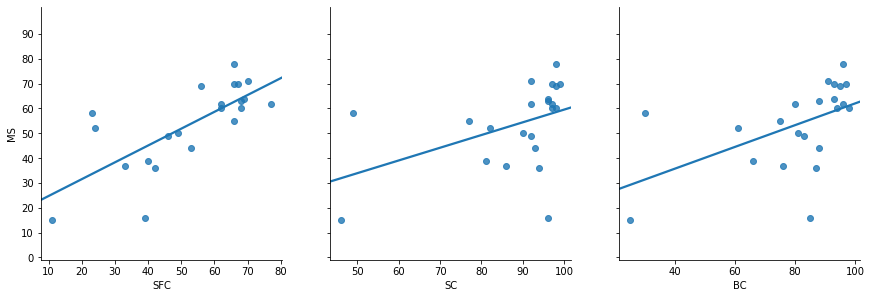

In [26]:
g = sns.PairGrid(results, y_vars=["MS"], x_vars=["SFC", "SC","BC"], height=4)
g.map(sns.regplot,ci=0, marker='o', truncate=False,)
g.set(ylim=(-1, 101), yticks=range(0,100,10));
g.fig.subplots_adjust(hspace=.2, wspace=0.2);
g.savefig("../img/reg.pdf", bbox_inches='tight');